In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Convertir TotalCharges a numérico, los errores se vuelven NaN (nulos)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Revisar cuántos nulos quedaron
print(f"Valores nulos en TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Como son pocos (aprox. 11), los eliminamos para no sesgar el análisis
df.dropna(inplace=True)

Valores nulos en TotalCharges: 11


In [5]:
# La columna customerID no sirve para el análisis estadístico, la quitamos
df.drop('customerID', axis=1, inplace=True)

# Cambiar la variable objetivo 'Churn' a números: Yes = 1, No = 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

**Análisis Visual**

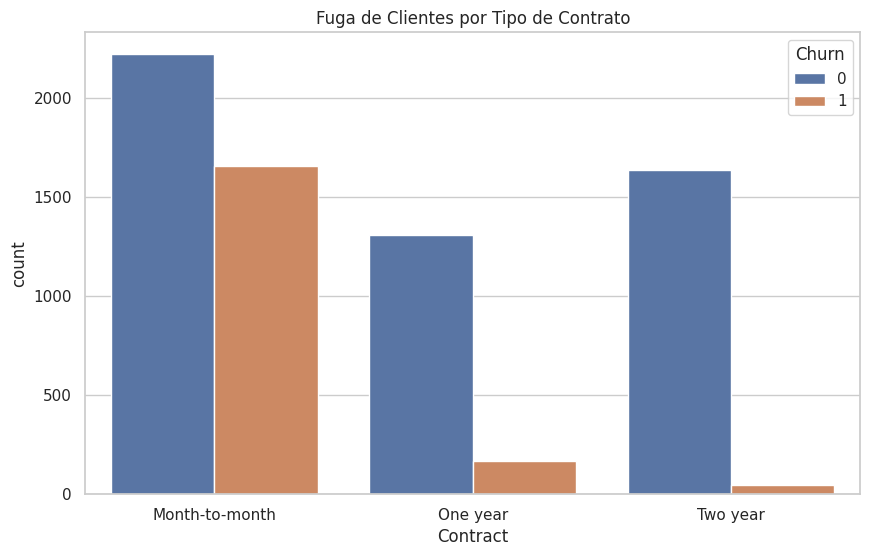

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")

# ¿Qué tipo de contrato tiene más fuga?
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Fuga de Clientes por Tipo de Contrato')
plt.show()

**Feature Engineering (Creación de Valor)**

In [8]:
# 1. Agrupar la antigüedad (Tenure) en cohortes para ver dónde está el riesgo
def group_tenure(t):
    if t <= 12: return '0-12 meses'
    elif t <= 24: return '1-2 años'
    elif t <= 48: return '2-4 años'
    else: return '4+ años'

df['TenureGroup'] = df['tenure'].apply(group_tenure)

In [9]:
# 2. Variable de "Servicios Totales" contratados
# Esto mide la "lealtad": a más servicios, más difícil es que el cliente se vaya
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['TotalServices'] = (df[services] == 'Yes').sum(axis=1)

# Ver la relación entre servicios y fuga
print(df.groupby('TotalServices')['Churn'].mean())

TotalServices
0    0.214641
1    0.457557
2    0.358180
3    0.273948
4    0.223529
5    0.124780
6    0.052817
Name: Churn, dtype: float64


**Preparación para Visualización (Power BI o Tableau)**

In [10]:
# Guardar el dataset limpio y procesado para usarlo en Power BI
df.to_csv('Telco_Churn_Clean.csv', index=False)

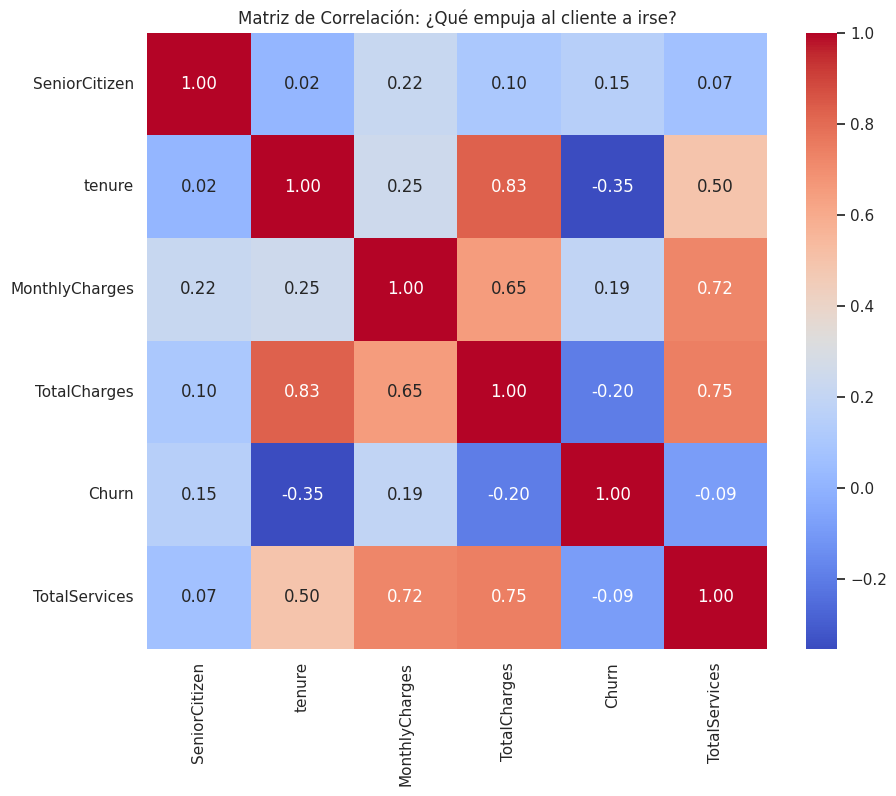

In [11]:
# Ver qué variables influyen más en el Churn (numéricamente)
# Solo columnas numéricas
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación: ¿Qué empuja al cliente a irse?')
plt.show()